##### Importing the required libraries

In [1]:
import pandas as pd

###### Loadig the bioactivity_preprocessed data

In [2]:
df=pd.read_csv('bioactivity_preprocessed_data3.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive
...,...,...,...,...
991,CHEMBL1401639,COc1cc(C2C(C#N)=C(N)OC3=C2C(=O)CC(C)(C)C3)c([N...,100000.0,inactive
992,CHEMBL1448985,O=C(NCCc1ccccc1)c1ccc2nc(-c3ccco3)c(-c3ccco3)n...,59120.0,inactive
993,CHEMBL1519374,O=C1C(Cl)=C(Nc2ccc3c[nH]nc3c2)C(=O)c2ccccc21,18650.0,inactive
994,CHEMBL1540372,CC1(C)CC(=O)C(=Cc2cn(CCC#N)nc2-c2ccc(Cl)cc2)C(...,31810.0,inactive


#### Calculate Lipinski descriptors

###### Import libraries

In [3]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors,Lipinski

#### Calculate descriptors

In [4]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors
    
   

In [5]:
df_lipinski=lipinski(df['canonical_smiles'])

In [6]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0
...,...,...,...,...
991,399.403,3.06288,1.0,8.0
992,409.445,5.12230,1.0,5.0
993,323.739,3.50440,2.0,4.0
994,381.863,4.45878,0.0,5.0


In [7]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive
...,...,...,...,...
991,CHEMBL1401639,COc1cc(C2C(C#N)=C(N)OC3=C2C(=O)CC(C)(C)C3)c([N...,100000.0,inactive
992,CHEMBL1448985,O=C(NCCc1ccccc1)c1ccc2nc(-c3ccco3)c(-c3ccco3)n...,59120.0,inactive
993,CHEMBL1519374,O=C1C(Cl)=C(Nc2ccc3c[nH]nc3c2)C(=O)c2ccccc21,18650.0,inactive
994,CHEMBL1540372,CC1(C)CC(=O)C(=Cc2cn(CCC#N)nc2-c2ccc(Cl)cc2)C(...,31810.0,inactive


In [8]:
df_combined=pd.concat([df,df_lipinski],axis=1)

In [9]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive,240.262,2.80020,0.0,4.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive,268.224,2.44040,1.0,4.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive,407.426,1.38560,1.0,5.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive,306.277,3.84800,1.0,5.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive,372.772,2.36698,0.0,8.0
...,...,...,...,...,...,...,...,...
991,CHEMBL1401639,COc1cc(C2C(C#N)=C(N)OC3=C2C(=O)CC(C)(C)C3)c([N...,100000.0,inactive,399.403,3.06288,1.0,8.0
992,CHEMBL1448985,O=C(NCCc1ccccc1)c1ccc2nc(-c3ccco3)c(-c3ccco3)n...,59120.0,inactive,409.445,5.12230,1.0,5.0
993,CHEMBL1519374,O=C1C(Cl)=C(Nc2ccc3c[nH]nc3c2)C(=O)c2ccccc21,18650.0,inactive,323.739,3.50440,2.0,4.0
994,CHEMBL1540372,CC1(C)CC(=O)C(=Cc2cn(CCC#N)nc2-c2ccc(Cl)cc2)C(...,31810.0,inactive,381.863,4.45878,0.0,5.0


#### Convert IC50 to pIC50

In [10]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [11]:
df_combined.standard_value.describe()

count       996.000000
mean      52923.182731
std       29910.483364
min        1610.000000
25%       30367.500000
50%       46255.000000
75%       77787.500000
max      100000.000000
Name: standard_value, dtype: float64

In [12]:
-np.log10( (10**-9)* 100000000 )

1.0

In [13]:
-np.log10( (10**-9)* 10000000000 )


-1.0

In [14]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [15]:
df_norm=norm_value(df_combined)
df_norm

C:\Users\Jayaprakash\anaconda3\envs\bioenv\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,100000.0
...,...,...,...,...,...,...,...,...
991,CHEMBL1401639,COc1cc(C2C(C#N)=C(N)OC3=C2C(=O)CC(C)(C)C3)c([N...,inactive,399.403,3.06288,1.0,8.0,100000.0
992,CHEMBL1448985,O=C(NCCc1ccccc1)c1ccc2nc(-c3ccco3)c(-c3ccco3)n...,inactive,409.445,5.12230,1.0,5.0,59120.0
993,CHEMBL1519374,O=C1C(Cl)=C(Nc2ccc3c[nH]nc3c2)C(=O)c2ccccc21,inactive,323.739,3.50440,2.0,4.0,18650.0
994,CHEMBL1540372,CC1(C)CC(=O)C(=Cc2cn(CCC#N)nc2-c2ccc(Cl)cc2)C(...,inactive,381.863,4.45878,0.0,5.0,31810.0


In [16]:
df_final=pIC50(df_norm)
df_final

C:\Users\Jayaprakash\anaconda3\envs\bioenv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
991,CHEMBL1401639,COc1cc(C2C(C#N)=C(N)OC3=C2C(=O)CC(C)(C)C3)c([N...,inactive,399.403,3.06288,1.0,8.0,4.000000
992,CHEMBL1448985,O=C(NCCc1ccccc1)c1ccc2nc(-c3ccco3)c(-c3ccco3)n...,inactive,409.445,5.12230,1.0,5.0,4.228266
993,CHEMBL1519374,O=C1C(Cl)=C(Nc2ccc3c[nH]nc3c2)C(=O)c2ccccc21,inactive,323.739,3.50440,2.0,4.0,4.729321
994,CHEMBL1540372,CC1(C)CC(=O)C(=Cc2cn(CCC#N)nc2-c2ccc(Cl)cc2)C(...,inactive,381.863,4.45878,0.0,5.0,4.497436


In [17]:
df_final.pIC50.describe()

count    996.000000
mean       4.369410
std        0.319120
min        4.000000
25%        4.109091
50%        4.334842
75%        4.517591
max        5.793174
Name: pIC50, dtype: float64

### Exploratory Data Analysis via Lipinski Descriptors

In [18]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the 2 bioactivity classes

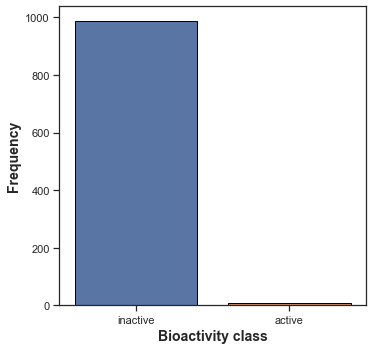

In [19]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

#### Scatter plot of MW versus LogP


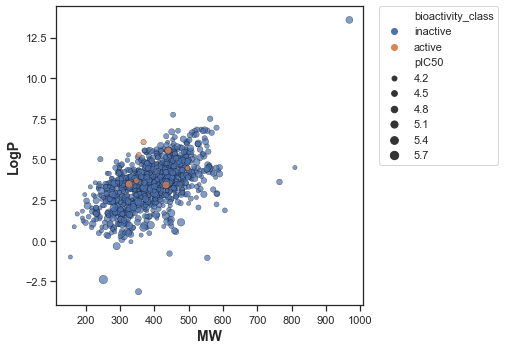

In [20]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

#### Box plots
#### pIC50 value

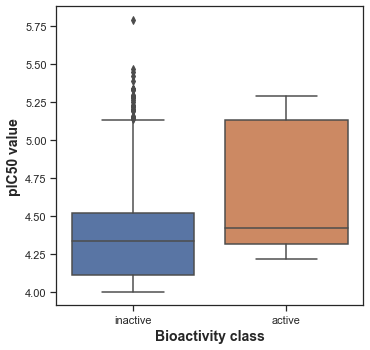

In [21]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')